# lab1_2

In [2]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output

In [3]:
sm.init_printing(use_latex='mathjax')
x, y, c = sm.symbols('x, y, c', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i')
uux1 = (uup1 - uum1)/(2*h)
uux2 = (uup1 - 2*uu0 + uum1)/(h**2)

In [4]:
zad1 = {
    'p': sm.sqrt(1 + x**2)*0.4,
    'q': 4*(1 + x**2),
    'f': 20*sm.exp(-x),
    'a': 0, 'UA': 0,
    'b': 2.5, 'UB': 0,
    'E': 0.05
}

In [5]:
def solve1(zad, n):
    apro = sm.Eq(uux2 + zad['p']*uux1 + zad['q']*uu0,  zad['f'])
    hh = (zad['b'] - zad['a']) / n
    us = sm.symbols(' '.join([f"u{i}" for i in range(n+1)]))
    list_x = [zad['a'] + hh*i for i in range(n+1)]
    
    tyts = [apro.subs({x: list_x[i], h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)]
    tyts.append(sm.Eq(us[0], zad['UA']))
    tyts.append(sm.Eq(us[5], zad['UB']))
    result = sm.solve(tyts, us)
    #return result
    #return list(zip(list_x, result.values()))
    return list_x, list(result.values())

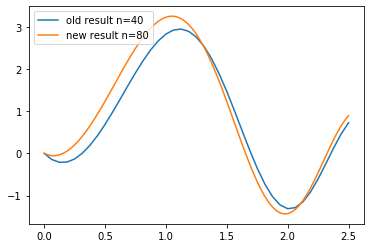

qwerty: q


In [6]:
E = zad1['E']
E_cur = 0
n = 10
result = solve1(zad1, n)
n *= 2
while(True):
    plt.plot(*result, label=f"old result n={int(n/2)}")
    result = solve1(zad1, n)
    plt.plot(*result, label=f"new result n={n}" )
    plt.legend(loc='upper left')
    plt.show()
    #display(*solve1(zad1, n))
    if(input("qwerty: ") == 'q'):
        break
    n *= 2
    clear_output()
    